In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

In [59]:
class population:
    def __init__(self, nInd, p0): # nInd - Number of Individuals, p0 - start probability
        self.p0 = p0
        self.nInd = nInd
        self.initial_population = np.zeros(nInd) 
        #self.initial_population[0 : int(p0*self.nInd)] = 1
        self.initial_population[nInd-1] = 1
        return
        
    def generation(self):
        count = 0
        for i in self.initial_population:
            if i>0: count+=1
        if count == 0 or count == self.nInd:return #exit if nothing happend
        p1 = (self.p0 + 1)*count/((self.p0 + 1)*count + self.nInd - count)# only formula from lection
        
        p1 = {0:(1 - p1)/(self.nInd - count), 1:p1/count} #dictionary

        p2 = []
        for i in self.initial_population:
            p2.append(p1[i])

        generated = np.random.choice(self.initial_population, size = self.nInd, p = p2)
        self.initial_population = generated
        return
    
    def is_it_started(self):
        count = 0
        for i in self.initial_population:
            if i > 0: return 1
        return 0

In [60]:
nInd = 100 # initial population size (number of individuals)
nGen = 100 # number of generations to simulate
nRuns = 100

In [61]:
p0 = np.arange(0, 0.1, 0.001) # initial proportion of "1" alleles 

In [62]:
history = []
for i in p0:
    generate = [population(nInd, i) for j in range(nRuns)]
    for gen in generate:
        for s in range(nGen):
            gen.generation()
    count = sum([gen.is_it_started() for gen in generate])
    history += [count/nRuns]

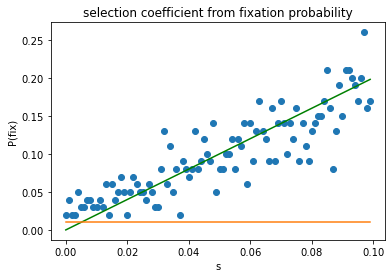

In [72]:
plt.plot(p0, history,"o")
plt.plot(p0,2*p0,"g")
plt.plot(p0,[1/nInd]*len(p0))
plt.title("selection coefficient from fixation probability")
plt.xlabel("s")
plt.ylabel("P(fix)")
plt.show()